In [3]:
# https://jef.works/STalign/notebooks/xenium-heimage-alignment.html
# import dependencies ---------------------
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch

from STalign import STalign

# make plots bigger
plt.rcParams["figure.figsize"] = (12,10)
path = "/Users/estelladong/Desktop/raw_data_must"

In [4]:
# 1. Read data -------------------------
# Single cell data 1
# read in data
fname = path + '/Xenium/outs/cells.csv.gz'
df1 = pd.read_csv(fname)
print(df1.head())

   cell_id  x_centroid  y_centroid  transcript_counts  control_probe_counts  \
0        1  847.259912  326.191365                 28                     1   
1        2  826.341995  328.031830                 94                     0   
2        3  848.766919  331.743187                  9                     0   
3        4  824.228409  334.252643                 11                     0   
4        5  841.357538  332.242505                 48                     0   

   control_codeword_counts  total_counts   cell_area  nucleus_area  
0                        0            29   58.387031     26.642187  
1                        0            94  197.016719     42.130781  
2                        0             9   16.256250     12.688906  
3                        0            11   42.311406     10.069844  
4                        0            48  107.652500     37.479687  


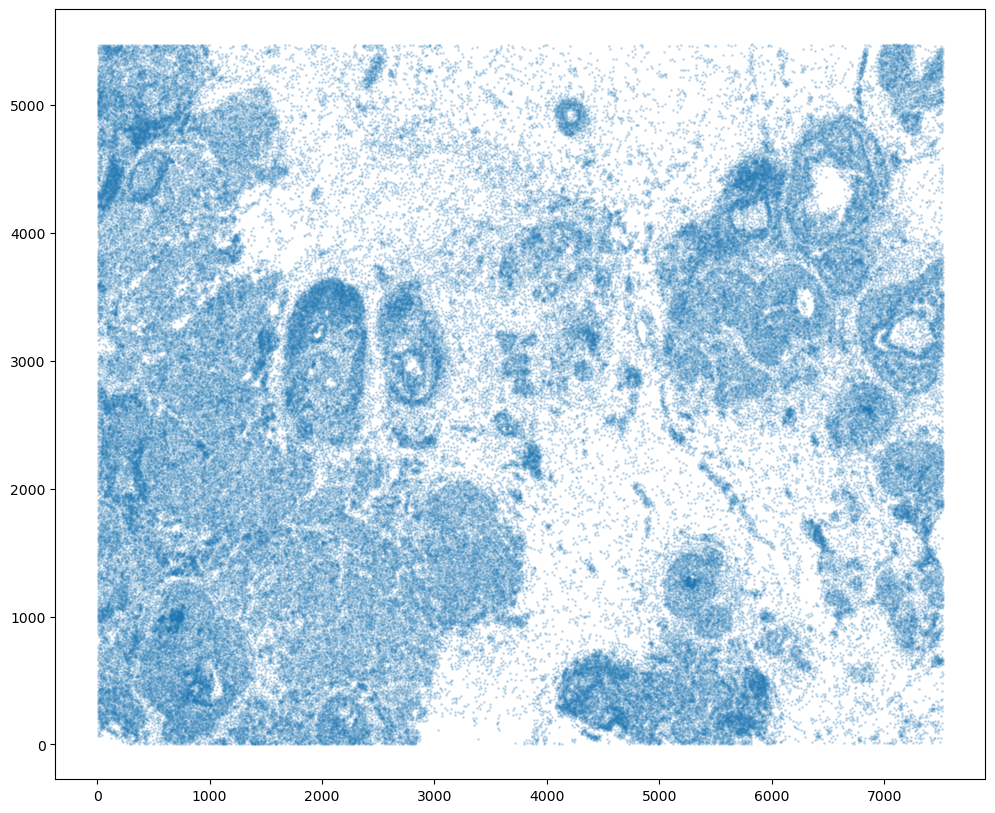

In [6]:
# 2. Xe1 plot --------------------------
# get cell centroid coordinates
xI = np.array(df1['x_centroid'])
yI = np.array(df1['y_centroid'])

# plot
fig,ax = plt.subplots()
ax.scatter(xI,yI,s=1,alpha=0.2)
plt.show()

0 of 167780
10000 of 167780
20000 of 167780
30000 of 167780
40000 of 167780
50000 of 167780
60000 of 167780
70000 of 167780
80000 of 167780
90000 of 167780
100000 of 167780
110000 of 167780
120000 of 167780
130000 of 167780
140000 of 167780
150000 of 167780
160000 of 167780
167779 of 167780


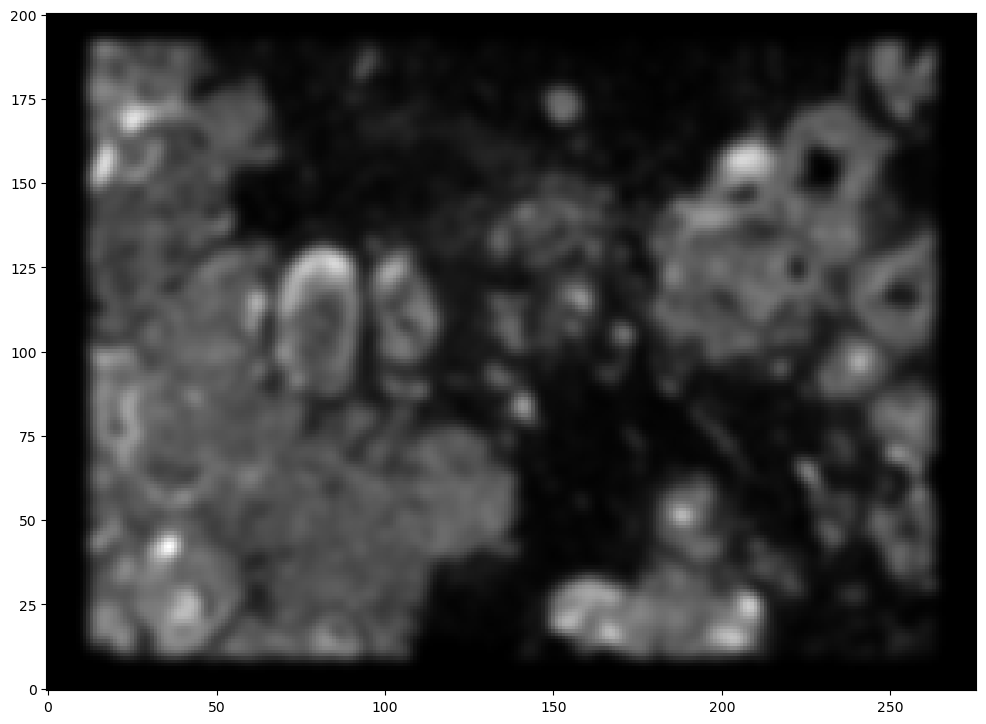

In [7]:
# 3. Rasterize -------------------------
XI,YI,I,fig = STalign.rasterize(xI,yI,dx=30)

# plot
ax = fig.axes[0]
ax.invert_yaxis()
plt.show()


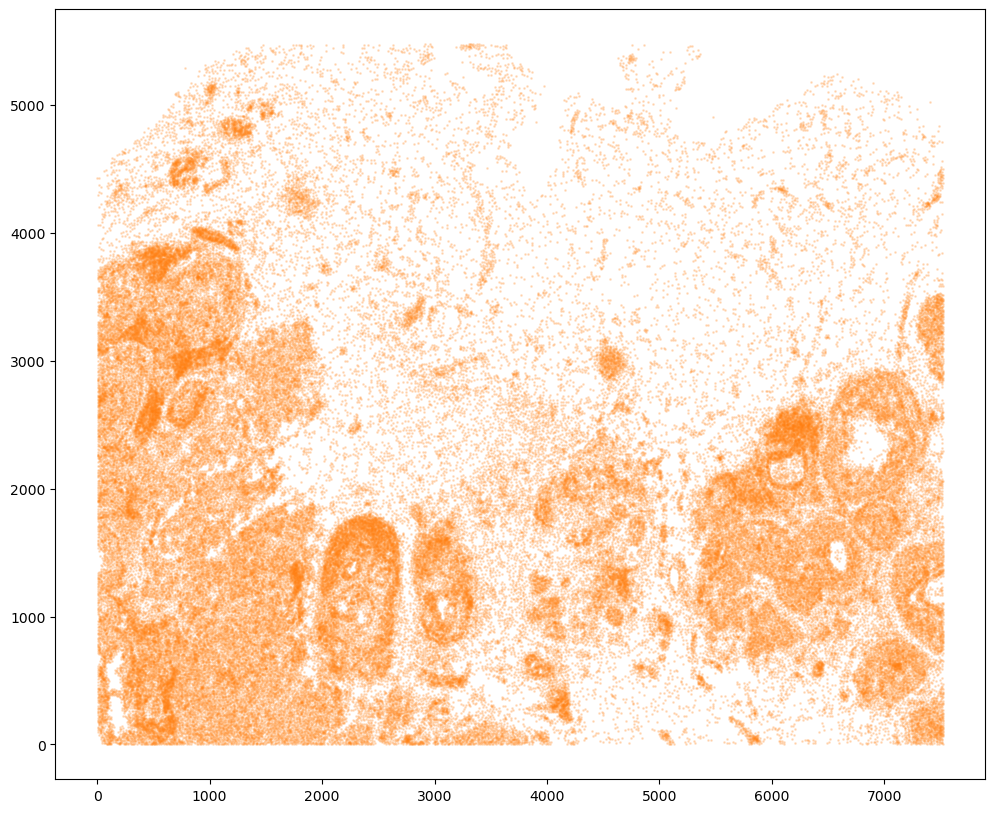

In [8]:
# 4. Repeat 1-3 for second dataset -----
# Single cell data 2
# read in data
fname = path + '/Xenium2/outs/cells.csv.gz'
df2 = pd.read_csv(fname)

# get cell centroids
xJ = np.array(df2['x_centroid'])
yJ = np.array(df2['y_centroid'])

# plot
fig,ax = plt.subplots()
ax.scatter(xJ,yJ,s=1,alpha=0.2,c='#ff7f0e')
plt.show()

0 of 118752
10000 of 118752
20000 of 118752
30000 of 118752
40000 of 118752
50000 of 118752
60000 of 118752
70000 of 118752
80000 of 118752
90000 of 118752
100000 of 118752
110000 of 118752
118751 of 118752


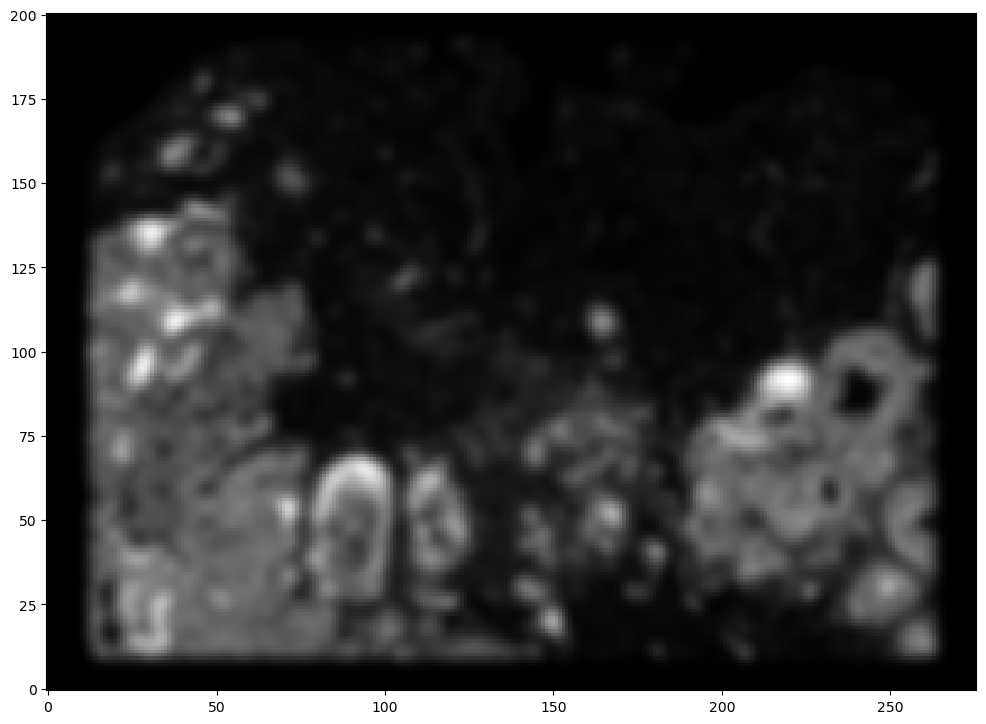

In [9]:
# rasterize and plot
XJ,YJ,J,fig = STalign.rasterize(xJ,yJ,dx=30)
ax = fig.axes[0]
ax.invert_yaxis()
plt.show()

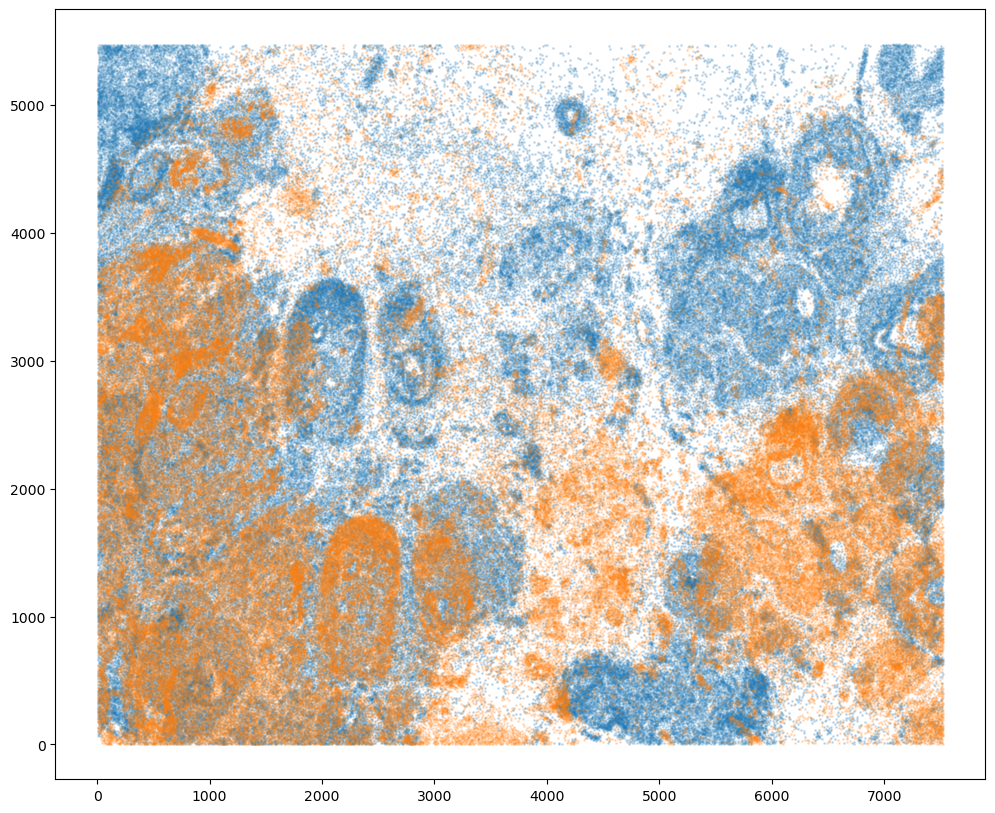

In [10]:
# 5. Plot overlay of unaligned ------------
# plot
fig,ax = plt.subplots()
ax.scatter(xI,yI,s=1,alpha=0.2)
ax.scatter(xJ,yJ,s=1,alpha=0.2)
plt.show()

In [11]:
# 8. Read landmarks selected from GUI ---------------------------
# read from file
pointsIlist = np.load(path + '/Xenium/outs/Xenium_Breast_Cancer_Rep1_curves.npy', allow_pickle=True).tolist()
print(pointsIlist)
# {'0': [(2131.810605092817, 3305.2189819028013)], '1': [(6547.254153479913, 4373.606078676995)], '2': [(4185.11705670572, 5007.960917386672)]}
pointsJlist = np.load(path + '/Xenium2/outs/Xenium_Breast_Cancer_Rep2_curves.npy', allow_pickle=True).tolist()
print(pointsJlist)
# {'A': [(2390.89730782228, 1485.9550435128795)], 'B': [(6831.381178790022, 2445.834075770944)], 'C': [(4544.365049757764, 3046.801817706428)]}


{'0': [(2131.810605092817, 3305.2189819028013)], '1': [(6547.254153479913, 4373.606078676995)], '2': [(4185.11705670572, 5007.960917386672)]}
{'A': [(2390.89730782228, 1485.9550435128795)], 'B': [(6831.381178790022, 2445.834075770944)], 'C': [(4544.365049757764, 3046.801817706428)]}


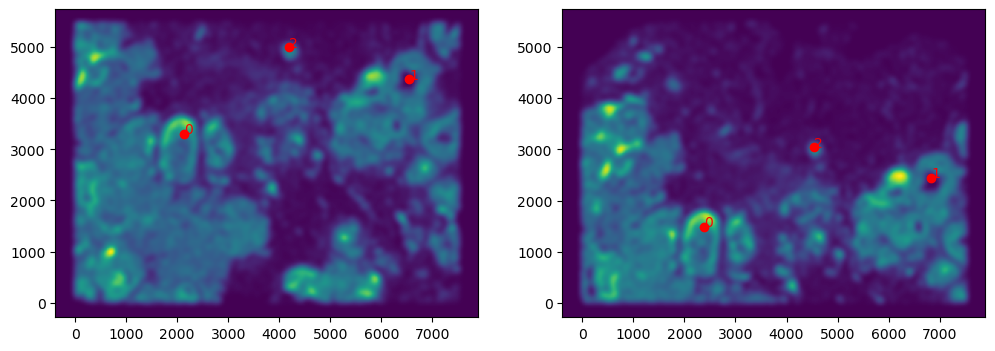

In [13]:
# 9. Convert to array ---------------------------
# convert to array
pointsI = []
pointsJ = []

# Jean's note: a bit odd to me that the points are stored as y,x
## instead of x,y but all downstream code uses this orientation
for i in pointsIlist.keys():
    pointsI.append([pointsIlist[i][0][1], pointsIlist[i][0][0]])
for i in pointsJlist.keys():
    pointsJ.append([pointsJlist[i][0][1], pointsJlist[i][0][0]])

pointsI = np.array(pointsI)
# array([[3305.2189819 , 2131.81060509],
#        [4373.60607868, 6547.25415348],
#        [5007.96091739, 4185.11705671]])
pointsJ = np.array(pointsJ)
# array([[1485.95504351, 2390.89730782],
#        [2445.83407577, 6831.38117879],
#        [3046.80181771, 4544.36504976]])

# 10. Plot them on image
# get extent of images
extentI = STalign.extent_from_x((YI,XI))
extentJ = STalign.extent_from_x((YJ,XJ))

# plot rasterized images
fig,ax = plt.subplots(1,2)
ax[0].imshow((I.transpose(1,2,0).squeeze()), extent=extentI) # just want 201x276 matrix
ax[1].imshow((J.transpose(1,2,0).squeeze()), extent=extentJ) # just want 201x276 matrix
# with points
ax[0].scatter(pointsI[:,1], pointsI[:,0], c='red')
ax[1].scatter(pointsJ[:,1], pointsJ[:,0], c='red')
for i in range(pointsI.shape[0]):
    ax[0].text(pointsI[i,1],pointsI[i,0],f'{i}', c='red')
    ax[1].text(pointsJ[i,1],pointsJ[i,0],f'{i}', c='red')
ax[0].invert_yaxis()
ax[1].invert_yaxis()
plt.show()

In [14]:
# 11. Affine ---------------------------------------
# compute initial affine transformation from points
L,T = STalign.L_T_from_points(pointsI, pointsJ)

/opt/homebrew/Caskroom/mambaforge/base/envs/STalign/lib/python3.11/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/opt/homebrew/Caskroom/mambaforge/base/envs/STalign/lib/python3.11/site-packages/STalign/STalign.py:1301: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axE[2].set_yscale('log')


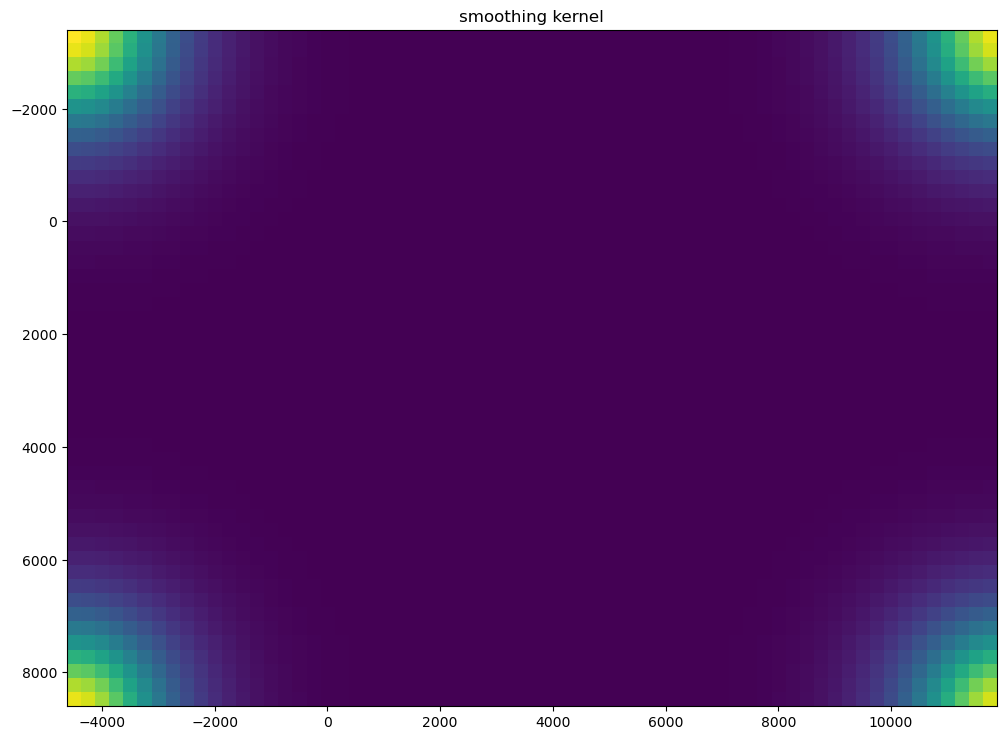

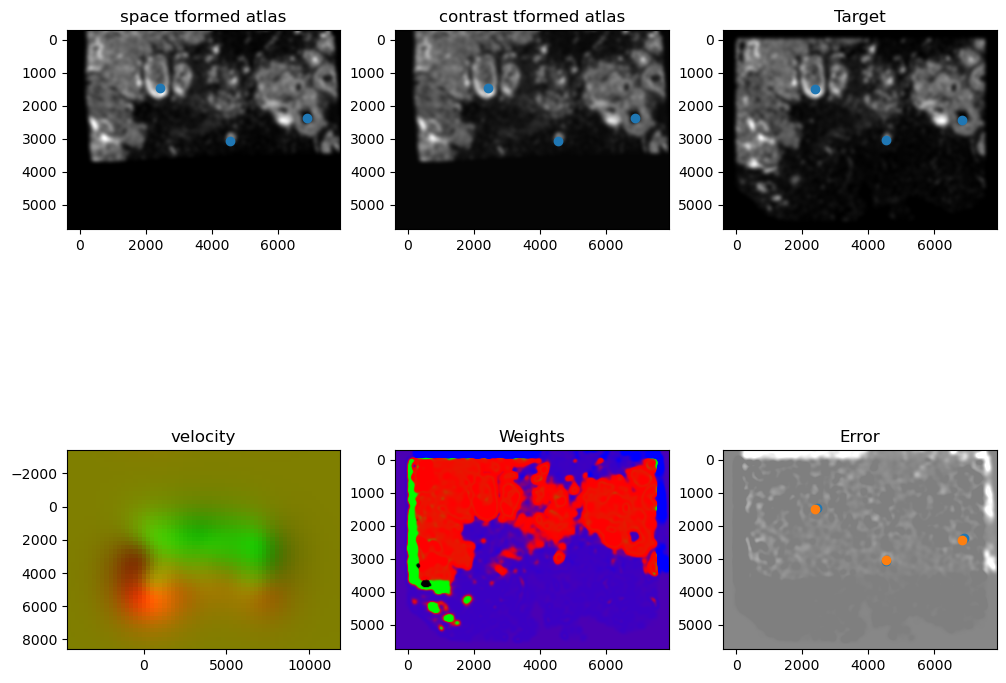

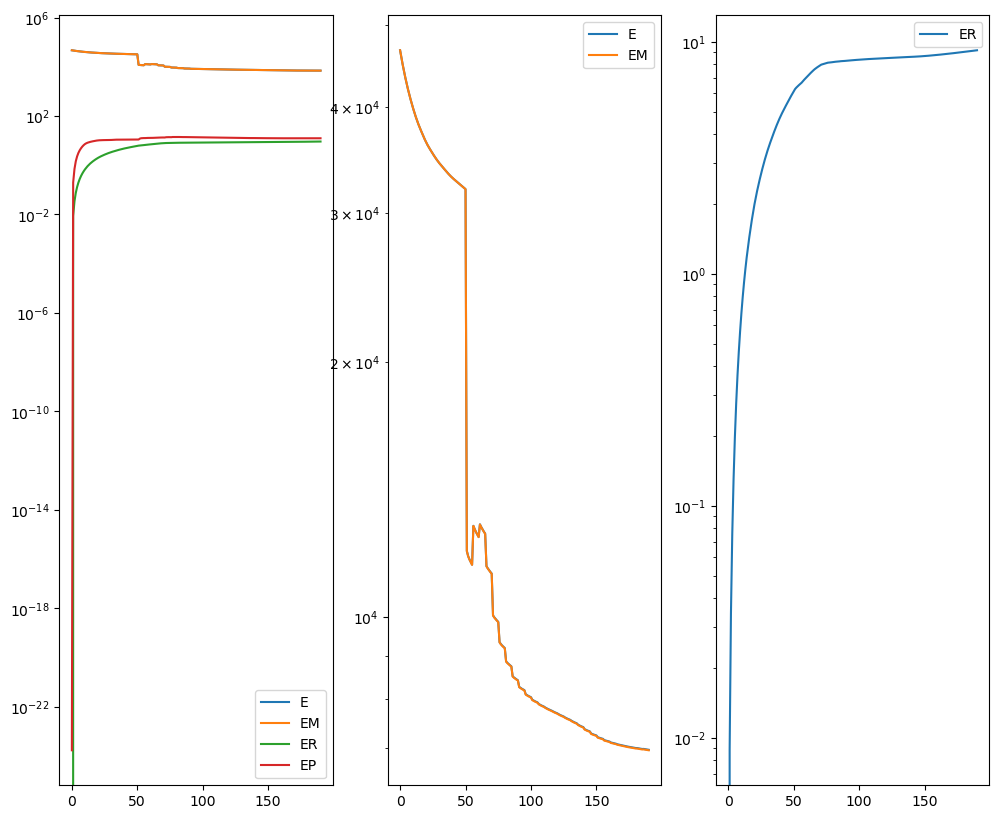

In [15]:
# 12. Run non-linear model -------------------------
# %%time

# run LDDMM
# specify device (default device for STalign.LDDMM is cpu)
if torch.cuda.is_available():
    device = 'cuda:0'
else:
    device = 'cpu'

# keep all other parameters default
params = {'L':L,'T':T,
          'niter':200,
          'pointsI':pointsI,
          'pointsJ':pointsJ,
          'device':device,
          'sigmaM':1.5,
          'sigmaB':1.0,
          'sigmaA':1.5,
          'epV': 100
          }

Ifoo = np.vstack((I, I, I)) # make RGB instead of greyscale
Jfoo = np.vstack((J, J, J)) # make RGB instead of greyscale
out = STalign.LDDMM([YI,XI],Ifoo,[YJ,XJ],Jfoo,**params)
plt.show()


In [16]:
# 13. Get non-linear output vars ------------------------
# get necessary output variables
A = out['A']
v = out['v']
xv = out['xv']
WM = out['WM']

In [17]:
# 16. Map to original coordinates -----------------------------
# apply transform to original points (from mouse brain tutorial Jean suggested)
tpointsJ= STalign.transform_points_target_to_atlas(xv,v,A, np.stack([yJ, xJ], 1))

#switch tensor from cuda to cpu for plotting with numpy
if tpointsJ.is_cuda:
    tpointsJ = tpointsJ.cpu()

# switch from row column coordinates (y,x) to (x,y)
xJ_LDDMM = tpointsJ[:, 1]
yJ_LDDMM = tpointsJ[:, 0]

# just Xe1 points for visualizing later
tpointsI = np.stack([xI, yI])

# # apply transform to Xe2 points (from original tutorial)
# tpointsJ = STalign.transform_points_target_to_atlas(xv,v,A, np.stack([yJ, xJ], 1))
#
# # just Xe1 points for visualizing later
# tpointsI = np.stack([xI, yI])

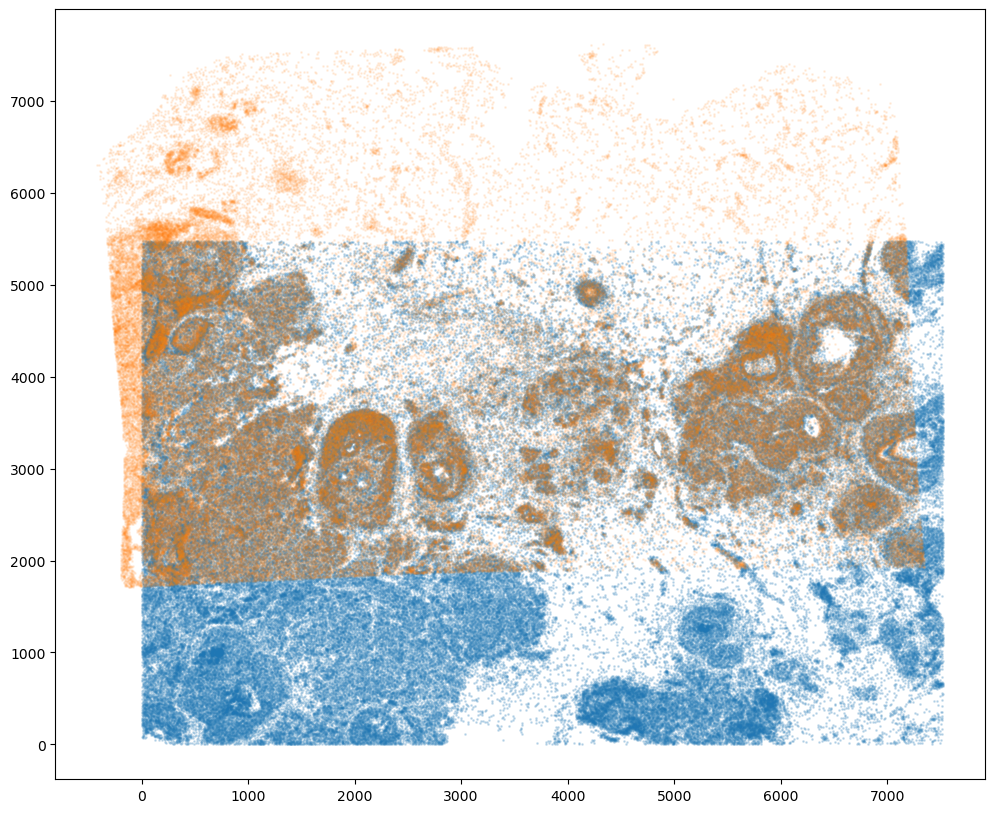

In [18]:
# 17. Plot overlay --------------------------------------------
# plot results
fig,ax = plt.subplots()
ax.scatter(tpointsI[0,:],tpointsI[1,:],s=1,alpha=0.2)
ax.scatter(tpointsJ[:,1],tpointsJ[:,0],s=1,alpha=0.1) # also needs to plot as y,x not x,y
plt.show()

In [19]:
# # 18. Save new coords -----------------------------------------
# # save results by appending
# # note results are in y,x coordinates
# results = np.hstack((df2, tpointsJ.numpy()))
# np.savetxt(path + '/Xenium2/outs/Xenium_Breast_Cancer_Rep2_STalign_to_Rep1.csv', results, delimiter=',')

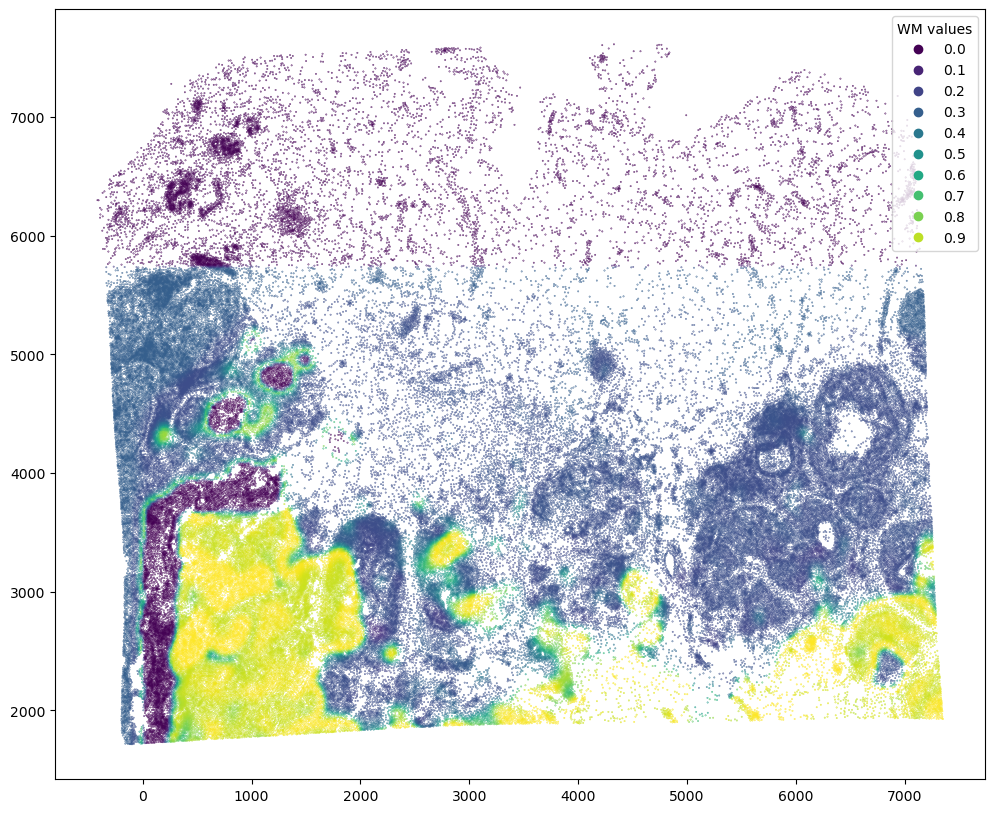

In [20]:
# 19. Subset to common region -------------------------------------------------------
# compute weight values for transformed source points from target image pixel locations and weight 2D array (matching)
testM = STalign.interp([YI,XI],WM[None].float(),tpointsJ[None].permute(-1,0,1).float())

#switch tensor from cuda to cpu for plotting with numpy
if testM.is_cuda:
    testM = testM.cpu()

fig,ax = plt.subplots()
scatter = ax.scatter(tpointsJ[:,1],tpointsJ[:,0],c=testM[0,0],s=0.1,vmin=0,vmax=1, label='WM values')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="WM values")
plt.show()

In [21]:
# 20. Obtain 'results', save the new aligned positions by appending to our original data ----------------------
if tpointsJ.is_cuda:
    df3 = pd.DataFrame(
        {"aligned_x": xJ_LDDMM.cpu(),
         "aligned_y": yJ_LDDMM.cpu(),
        },
    )
else:
    df3 = pd.DataFrame(
        {"aligned_x": xJ_LDDMM,
         "aligned_y": yJ_LDDMM,
        },
    )
results = pd.concat([df2, df3], axis=1)
results.head()


cell_id  x_centroid  y_centroid  transcript_counts  control_probe_counts  \
0        1  479.934467  869.789633                207                     0   
1        2  481.256989  851.689365                147                     0   
2        3  490.647247  855.816202                165                     0   
3        4  491.177719  866.842908                186                     0   
4        5  492.839691  842.511191                 82                     0   

   control_codeword_counts  total_counts   cell_area  nucleus_area  \
0                        0           207  166.310469     44.343438   
1                        0           147  218.420781     37.253906   
2                        0           165  110.723125     42.717813   
3                        0           186  181.482969     63.354219   
4                        0            82  152.989375     17.204531   

    aligned_x    aligned_y  
0  255.592021  2643.966440  
1  256.231662  2625.284709  
2  264.766140  2629.910761  
3  265.567675  2641.338434  
4  266.337574  2616.230240

In [22]:
# 21. save 'weight' values to 'results' --------------------------------
results['WM_values'] = testM[0,0]

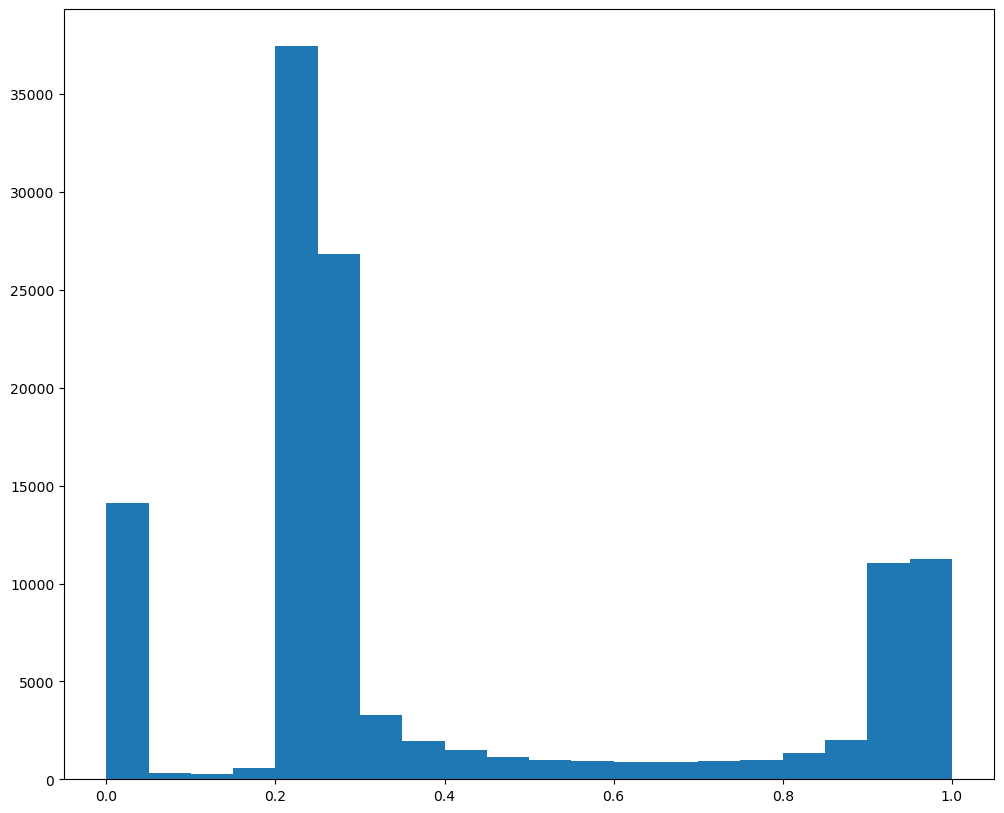

In [23]:
# 22. check weight histogram -------------------------------------------
fig,ax = plt.subplots()
ax.hist(results['WM_values'], bins = 20)
plt.show()